In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import  accuracy_score,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

## 1. 
Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [32]:
df = pd.read_excel("heart_disease.xlsx",sheet_name = 'Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## 2.
Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [4]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [5]:
df.duplicated().any()

True

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().any()

False

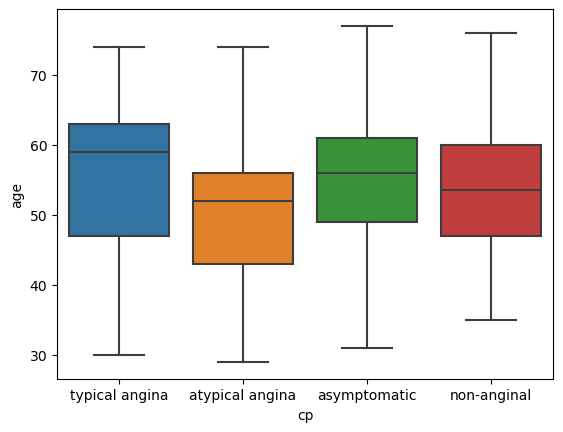

In [12]:
sns.boxplot(data=df, x='cp', y='age')
plt.show()

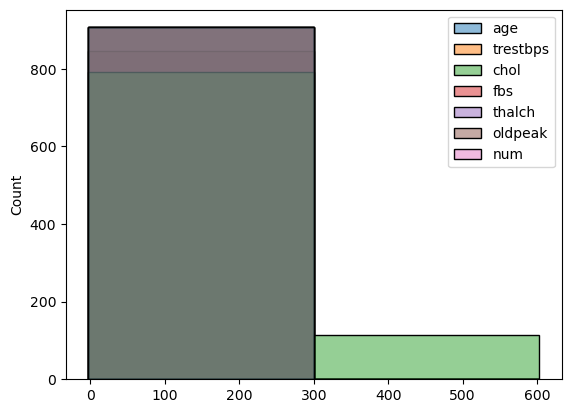

In [15]:
sns.histplot(df,bins = 2)
plt.show()

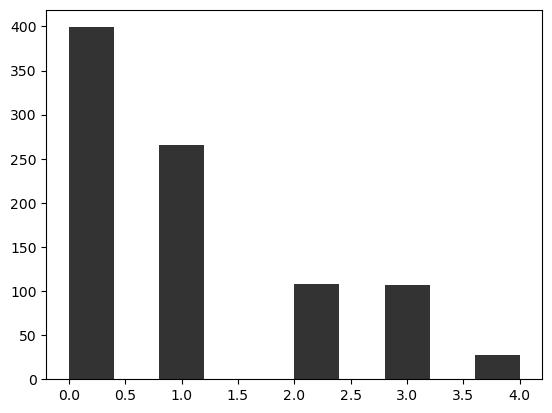

In [17]:
plt.hist(df['num'],bins = 10, color='black',alpha=0.8)
plt.show()

<Axes: xlabel='fbs'>

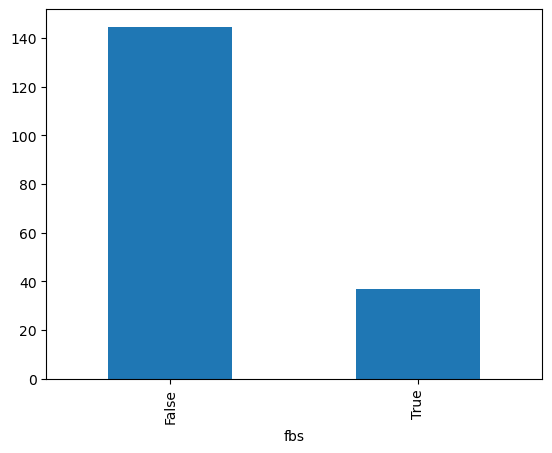

In [34]:
pd.crosstab(df['num'],df['fbs']).mean().plot(kind='bar')

<Axes: xlabel='num'>

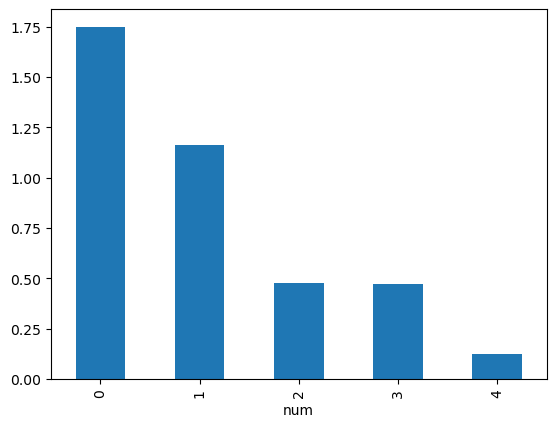

In [35]:
pd.crosstab(df['chol'],df['num']).mean().plot(kind='bar')

<Axes: xlabel='cp'>

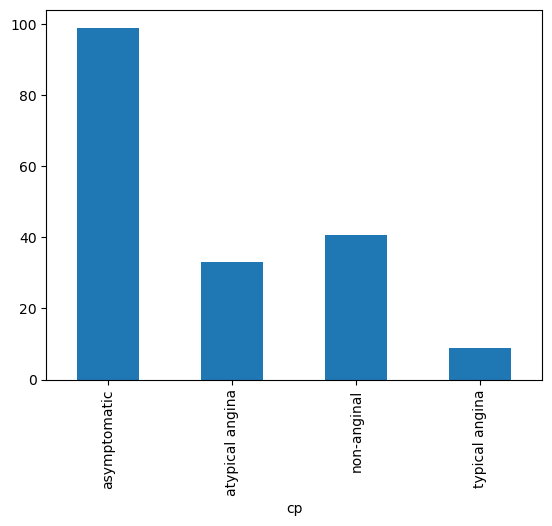

In [36]:
pd.crosstab(df['num'],df['cp']).mean().plot(kind='bar')

## 3.
Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder=LabelEncoder()
df["cp"]=label_encoder.fit_transform(df["cp"])
df["restecg"]=label_encoder.fit_transform(df["restecg"])
df["slope"]=label_encoder.fit_transform(df["slope"])
df["thal"]=label_encoder.fit_transform(df["thal"])
df["fbs"]=label_encoder.fit_transform(df["fbs"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,0,3,145,233,1,0,150,False,2.3,0,0,0
1,41,0,1,135,203,0,1,132,False,0.0,1,0,0
2,57,0,0,140,192,0,1,148,False,0.4,1,0,0
3,52,0,3,118,186,0,0,190,False,0.0,1,0,0
4,57,0,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,0,125,0,0,1,120,False,1.5,2,2,4
904,62,0,0,166,170,0,2,120,True,3.0,1,2,4
905,56,0,2,170,0,0,0,123,True,2.5,0,1,4
906,56,0,2,144,208,1,2,105,TURE,NaN,0,0,4


In [45]:
df['sex'] = df['sex'].map({'Male':0,'Female':1})

<Axes: >

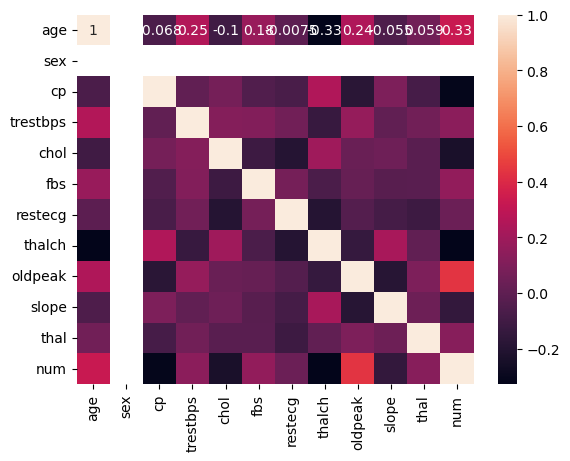

In [56]:
sns.heatmap(df.corr(),annot=True)

## 4.
Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [60]:
target=df[['num']]
feature=df.drop('num',axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std_scaler = StandardScaler()

In [66]:
feature = std_scaler.fit_transform(feature)

In [103]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.80,random_state=100)

In [104]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 11)
(726, 1)
(182, 11)
(182, 1)


In [105]:
from sklearn.impute import SimpleImputer

In [106]:
sim_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [107]:
x_train = sim_imp.fit_transform(x_train)
y_train = sim_imp.fit_transform(y_train)
x_test = sim_imp.fit_transform(x_test)
y_test = sim_imp.fit_transform(y_test)

In [159]:
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [160]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [161]:
y_pred = dec_tree.predict(x_test)

In [162]:
accuracy_score(y_test,y_pred)

0.521978021978022

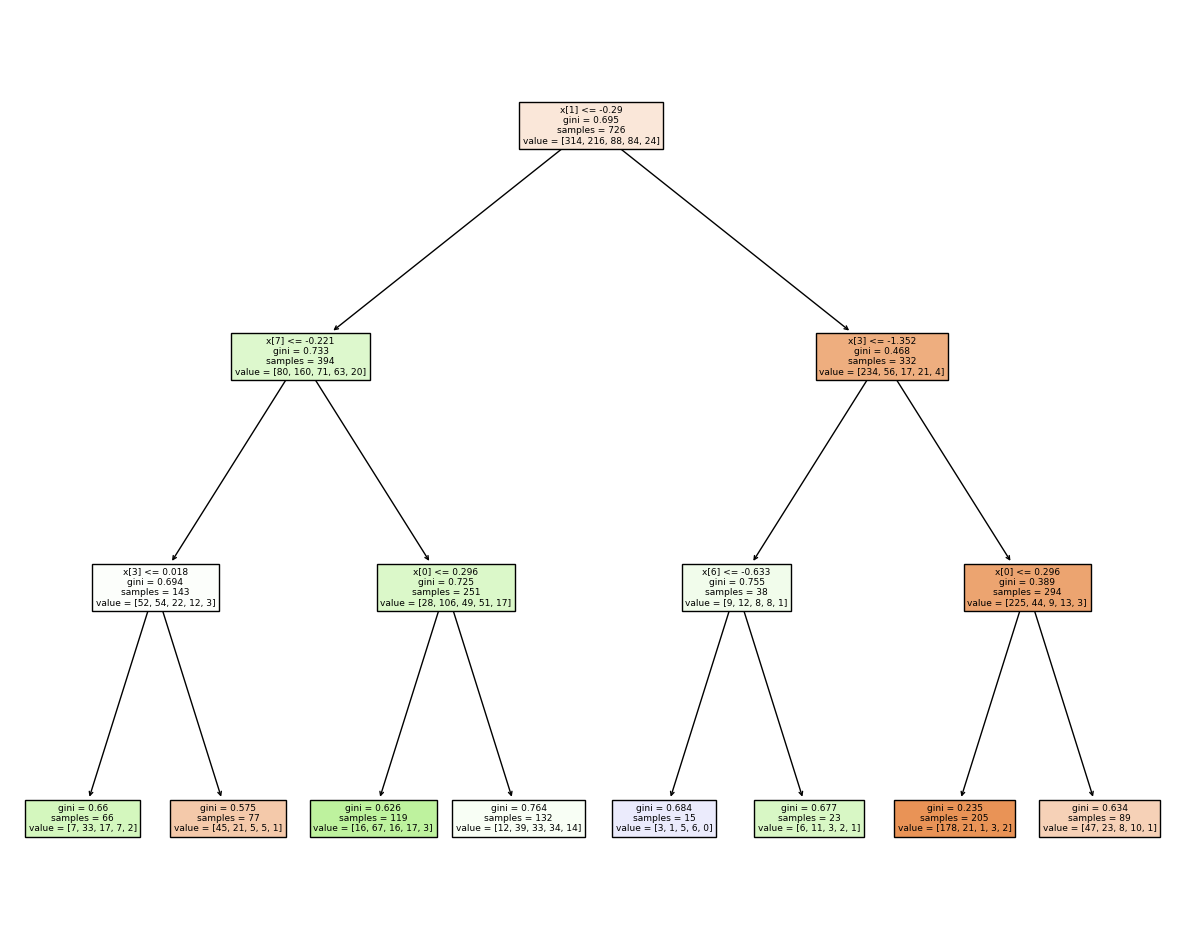

In [163]:
plt.figure(figsize=(15,12))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [115]:
params = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 2, 3, 4, 5]}

In [118]:
grid_search = GridSearchCV(dec_tree,params)

In [119]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [120]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [124]:
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4)

In [125]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [128]:
y_pred = dec_tree.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred)

0.521978021978022

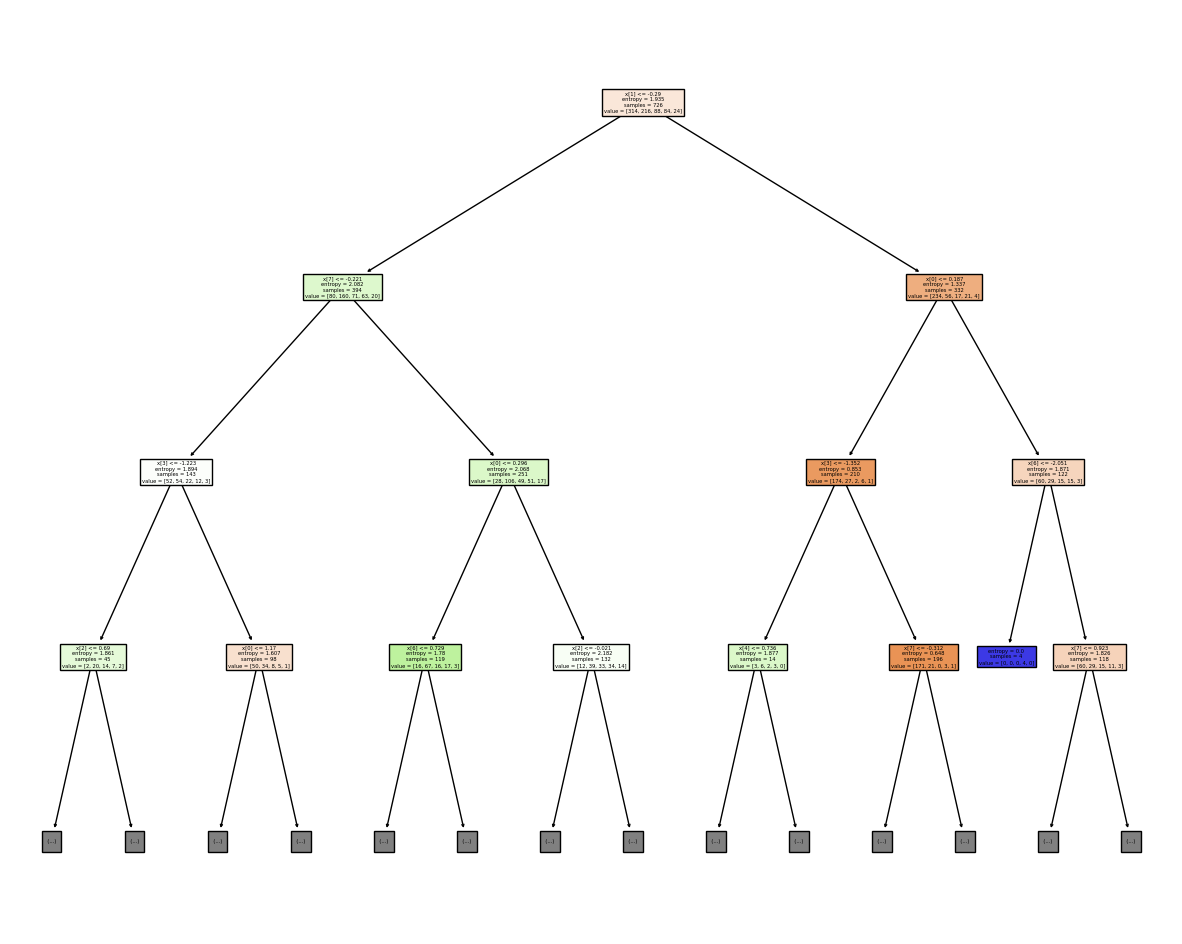

In [139]:
plt.figure(figsize=(15,12))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [155]:
from sklearn.metrics import classification_report,confusion_matrix

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        85
         1.0       0.41      0.37      0.39        49
         2.0       0.05      0.05      0.05        21
         3.0       0.35      0.26      0.30        23
         4.0       0.00      0.00      0.00         4

    accuracy                           0.52       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.48      0.52      0.50       182



In [157]:
confusion_matrix(y_test,y_pred)

array([[70,  7,  6,  2,  0],
       [22, 18,  6,  3,  0],
       [ 6,  9,  1,  5,  0],
       [ 4,  8,  5,  6,  0],
       [ 0,  2,  1,  1,  0]], dtype=int64)

<Axes: >

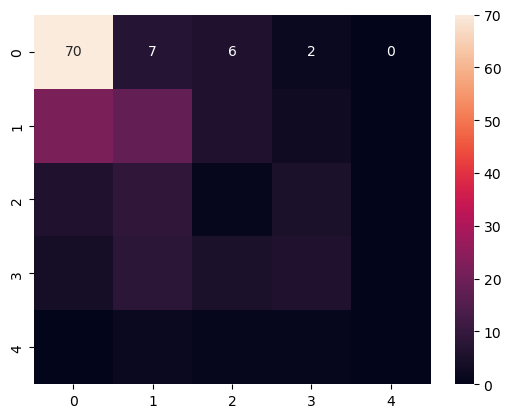

In [158]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?


#### Answer1 : 
The Decision Tree have several parameter but the main hyperparameter that effect the most are 'criterion','splitter' and 'max_depth',in samples split '

Criterion is used to make a choice between Gini and Entropy.

Splitter is used to make a choice between Best and Random.

Max_depth is used to give the deepth to the tree.

This specifies the minimum number of samples required to split an internal node

#### Answer2:
Label Encoder is a technique  that is used to assign each category into a integer the Label Encoder is prefered over the ordinal data. 

One Hot Encoder is a technique where each category is represented as a binary the OneHot Encoder is prefered over the nominal data.